<a href="https://colab.research.google.com/github/bbinkiewicz/WSiZ_SI_Lab/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    horsepower  time-to-sixty
0        165.0           12.0
1         71.0           14.0
2        140.0           11.0
3        150.0           10.0
4         63.0           17.0
5        125.0           17.0
6        158.0           13.0
7        215.0            9.0
8         77.0           20.0
9         62.0           17.0
10        70.0           17.0
11        78.0           16.0
12       140.0           14.0
13       180.0           11.0
14        90.0           19.0
15       155.0           15.0
16        65.0           19.0
17       150.0           12.0
18        95.0           16.0
19        90.0           15.0


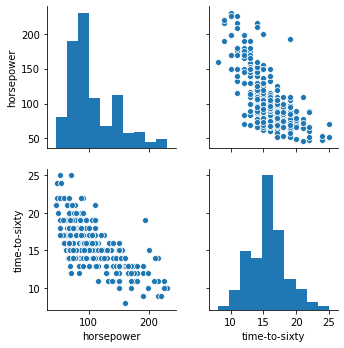

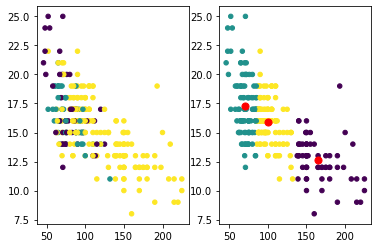

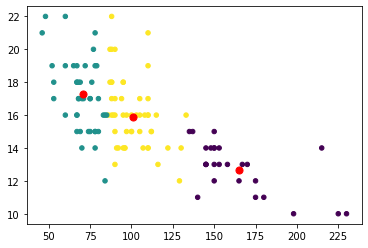

In [69]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym


from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cars = fetch_openml('cars1')


features = []
features.append(cars.feature_names[3])
features.append(cars.feature_names[5])
#zobrazowanie danych w postaci  tabeli 
cars_df = pd.DataFrame(data = cars.data[:, [3, 5]], columns=features)
#wizualizacja mocy i przyspieszenia
print(cars_df.head(20))
sns.pairplot(cars_df)
plt.show()


X = cars.data[:, [3, 5]]
y = cars['target']
y = [int(elem) for elem in y]
y[:5]

#podział zbioru, utworzenie klasyfikatora i uczenie bez nadzoru na zbiorze testowym
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
kmn = KMeans(n_clusters=3)
kmn.fit(X_train)

#punkty centralne klastrów
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Zadanie 2
#Klasy samochodów mogą odpowiadać ich rzeczywistemu przeznaczeniu
# są to 2 - samochody sportowe z duzymi silnikami i wysokim spalaniem
# 1 - samochody klasy średniej
# 0 - samochody miejske o małym silniku i mocy oraz spalaniu

